In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


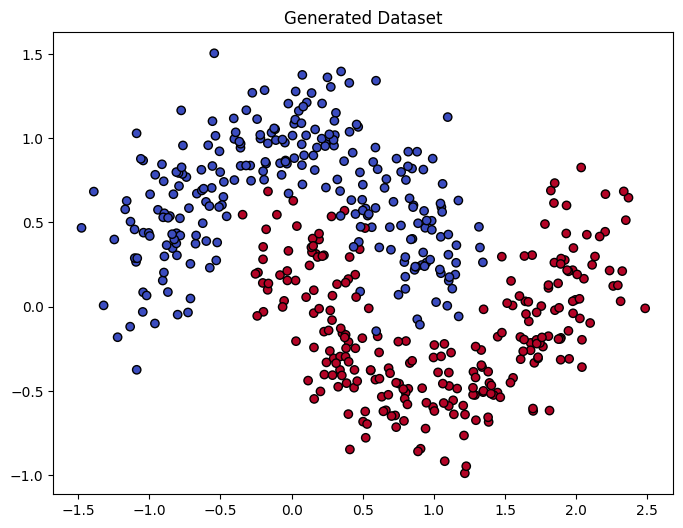

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
plt.title("Generated Dataset")
plt.show()

In [ ]:
def evaluate_classifier(name, clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

    # Ploting decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="coolwarm")
    plt.title(f"{name} Decision Boundary")
    plt.show()

Logistic Regression (Linear) Accuracy: 0.87


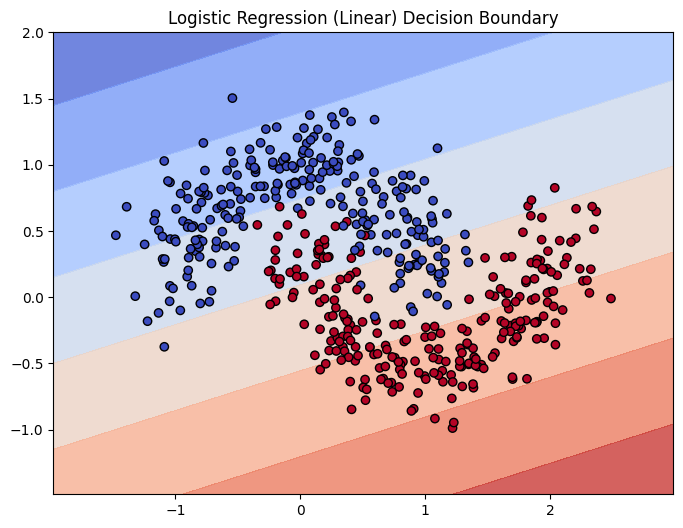

In [ ]:
evaluate_classifier("Logistic Regression (Linear)", LogisticRegression())

SVM with RBF Kernel Accuracy: 0.98


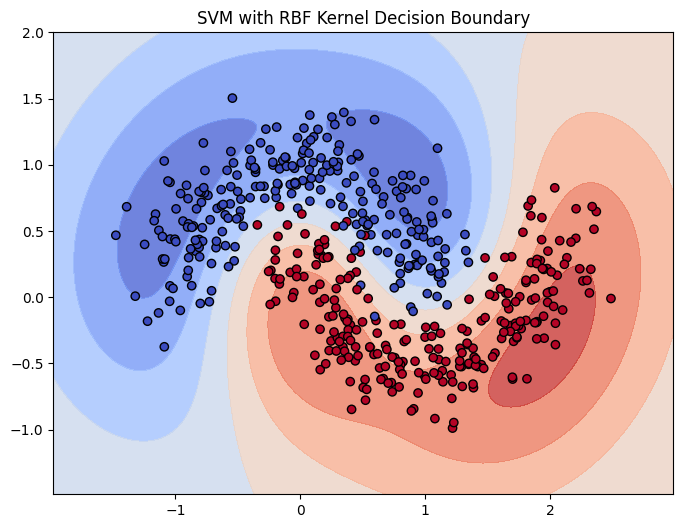

In [ ]:
evaluate_classifier("SVM with RBF Kernel", SVC(kernel="rbf", probability=True))

Decision Tree Accuracy: 0.97


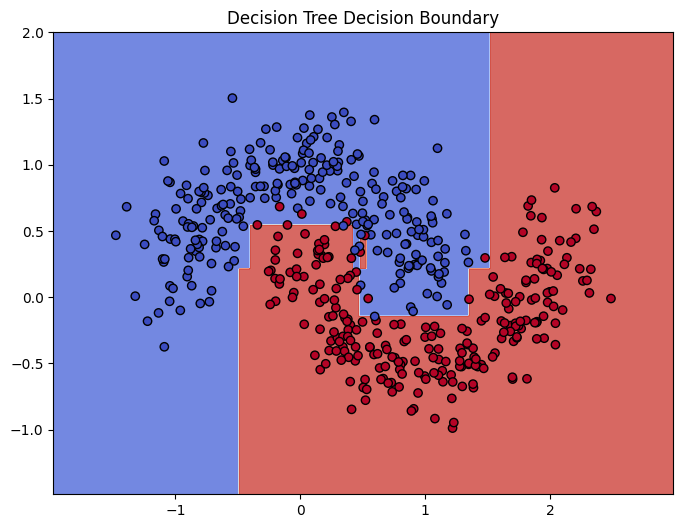

In [ ]:
evaluate_classifier("Decision Tree", DecisionTreeClassifier())


Random Forest Accuracy: 0.99


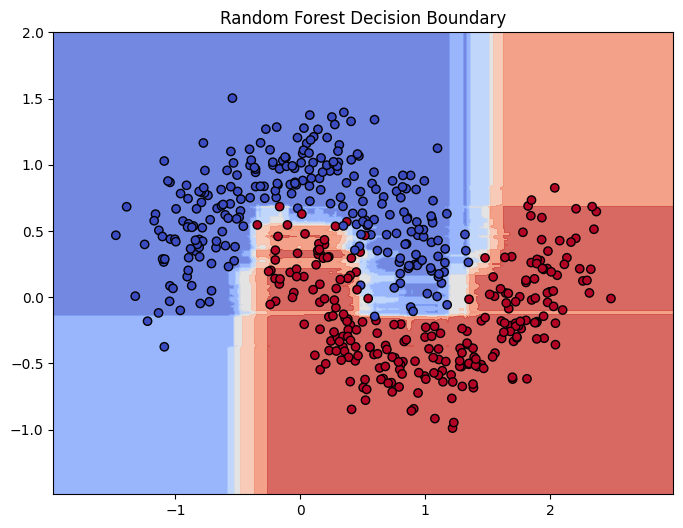

In [ ]:
evaluate_classifier("Random Forest", RandomForestClassifier())

Gradient Boosting Accuracy: 0.97


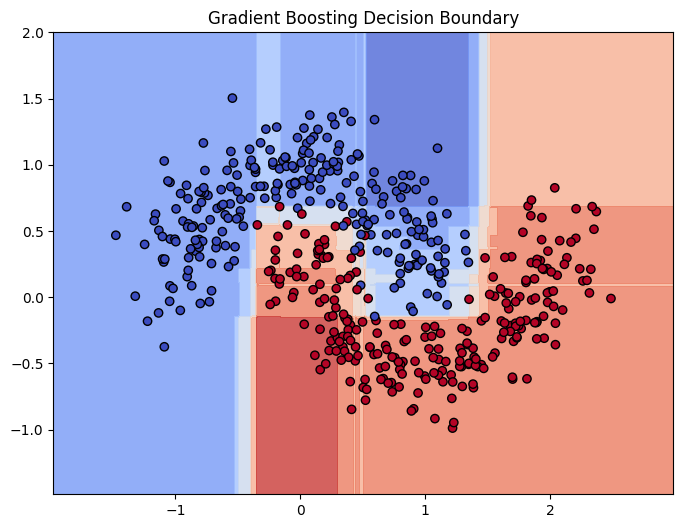

In [ ]:
evaluate_classifier("Gradient Boosting", GradientBoostingClassifier())

Naive Bayes Accuracy: 0.87


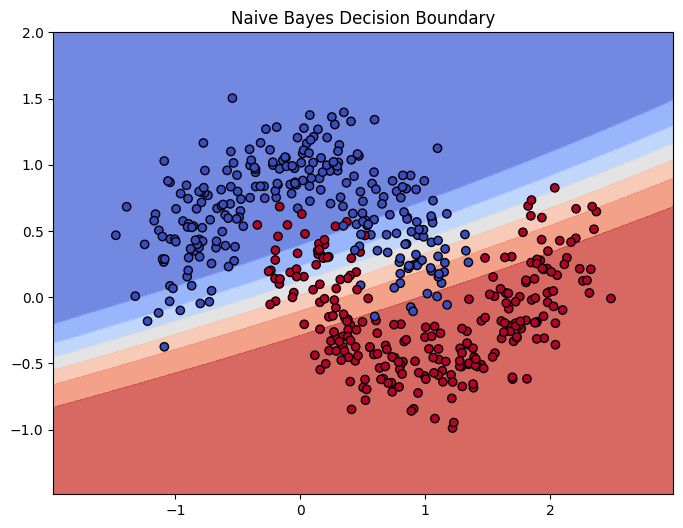

In [ ]:
evaluate_classifier("Naive Bayes", GaussianNB())
